In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [16]:
hcho_data = pd.read_csv('DataFrame\\processed_df.csv')

In [17]:
hcho_data.head()

,HCHO_reading,Location,Current_Date,Next_Date
0,0.000088,kurunegala proper,2019-01-01,2019-01-02
1,0.000137,kurunegala proper,2019-01-02,2019-01-03
2,0.000148,kurunegala proper,2019-01-03,2019-01-04
3,0.000148,kurunegala proper,2019-01-04,2019-01-05
4,0.000249,kurunegala proper,2019-01-05,2019-01-06


In [18]:
hcho_data.dtypes

HCHO_reading    float64
Location         object
Current_Date     object
Next_Date        object
dtype: object

## Trends over time

## HCHO level changes over past years

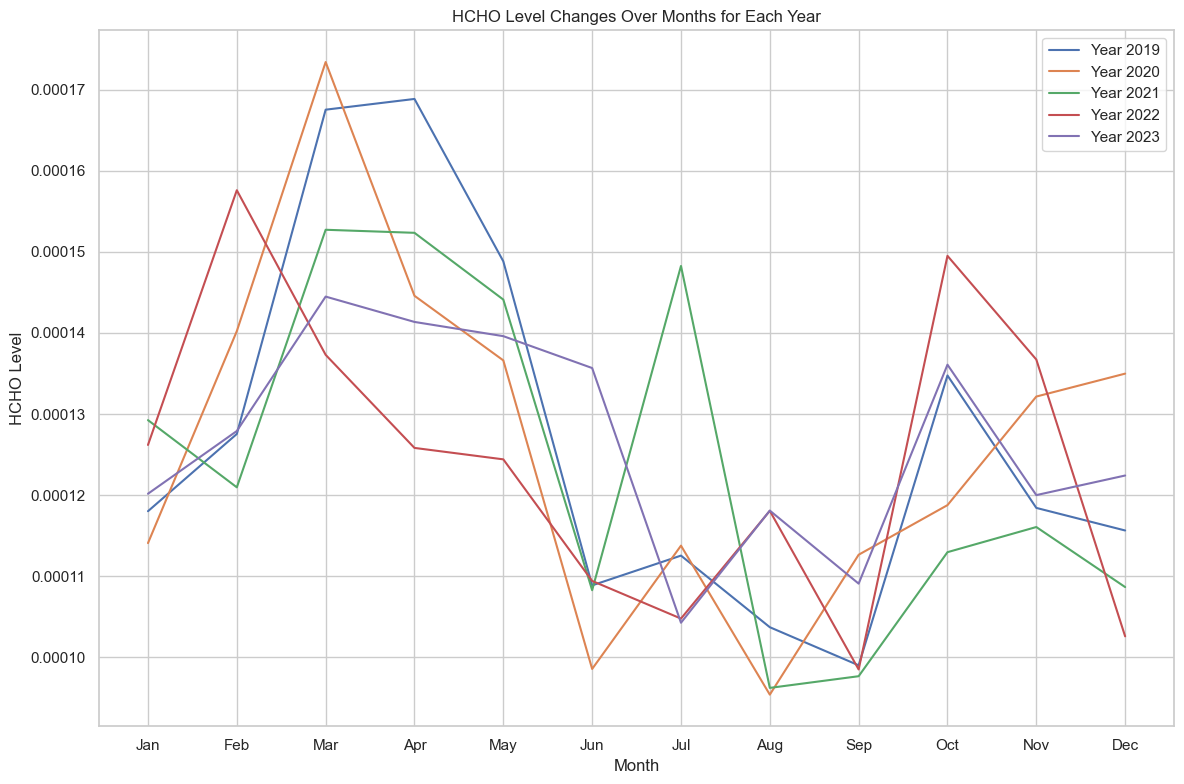

In [19]:
hcho_data['Current_Date'] = pd.to_datetime(hcho_data['Current_Date'])

# get year and month from the Date column
hcho_data['Year'] = hcho_data['Current_Date'].dt.year
hcho_data['Month'] = hcho_data['Current_Date'].dt.month

# group data by year and month and calculate mean HCHO level
monthly_mean_hcho = hcho_data.groupby(['Year', 'Month'])['HCHO_reading'].mean().reset_index()

# month names
month_names = [calendar.month_abbr[i] for i in range(1, 13)]

# plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# loop through each year and plot HCHO levels over months
for year in monthly_mean_hcho['Year'].unique():
    data_year = monthly_mean_hcho[monthly_mean_hcho['Year'] == year]
    plt.plot(data_year['Month'], data_year['HCHO_reading'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('HCHO Level Changes Over Months for Each Year')
plt.xticks(range(1, 13), month_names)  # month names obtained from the calendar module
plt.legend()
plt.tight_layout()
plt.show()

### When comparing HCHO level changes over months throughout five years, there is a trend of lower HCHO levels in June to September timeframe compared  to March to May.

HCHO levels can be vary due to several reasons. Here are some reasons to affect HCHO level.

1.Seasonal temperature variations
2.Ventilation patterns
3.Biomass burning
4.Industrial emissions
5.Meteorological factors

When we consider about Sri Lanka, From March to May timeframe generally has warmer temperature. So it can potentially leading to higher HCHO concentrations.

From June to September timeframe is the Southwest monsoon season. So the lower temperatures can lead to potentially lowering HCHO emissions. Rainfall during the monsoon can help remove HCHO from the air through a process called scavenging, contributing to lower HCHO levels.


References - https://climateknowledgeportal.worldbank.org/country/sri-lanka/climate-data-historical, https://www.ncbi.nlm.nih.gov/books/NBK138711/   

According to the Department of Meteorology Sri Lanaka the Climate experienced during 12 months period can be characterized in to 4 climate seasons.

References - https://www.meteo.gov.lk/index.php?option=com_content&view=article&id=94&Itemid=310&lang=en&lang=en

*1. First Inter-monsoon Season (March - April)*

*2. Southwest -monsoon Season (May - September)*

*3. Second Inter-monsoon Season (October-November)*

*4. Northeast -monsoon Season (December - February)*

So we can analyze seasonal variations based on these climate changes in Sri lnaka

### 2019 Analysis

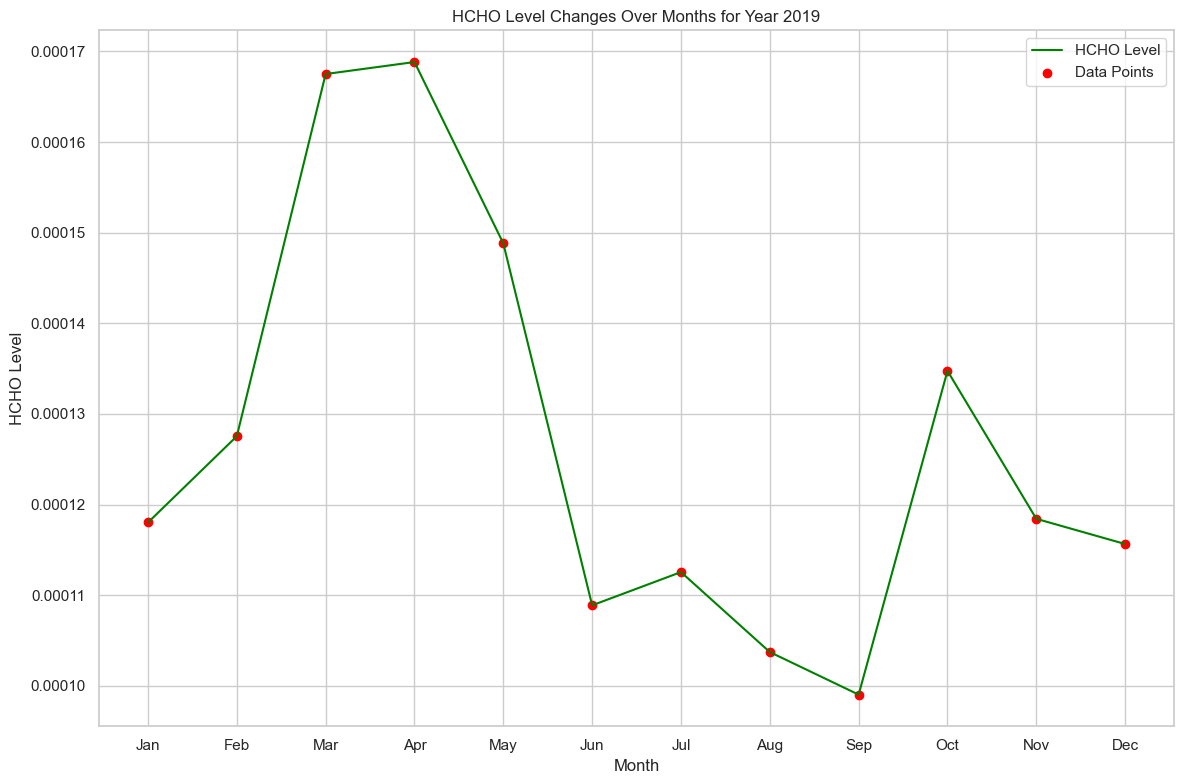

In [20]:
# Convert 'Current_Date' column to datetime format
hcho_data['Current_Date'] = pd.to_datetime(hcho_data['Current_Date'])

# Filter data for the year 2019
hcho_data_2019 = hcho_data[hcho_data['Current_Date'].dt.year == 2019].copy()  # Make a copy to avoid warnings

# Get year and month from the 'Current_Date' column using .loc for assignment
hcho_data_2019.loc[:, 'Year'] = hcho_data_2019['Current_Date'].dt.year
hcho_data_2019.loc[:, 'Month'] = hcho_data_2019['Current_Date'].dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho_2019 = hcho_data_2019.groupby(['Year', 'Month'])['HCHO_reading'].mean().reset_index()

# Get month names from the calendar module
month_names = [calendar.month_abbr[i] for i in range(1, 13)]  # e.g., ['Jan', 'Feb', 'Mar', ...]

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
plt.plot(monthly_mean_hcho_2019['Month'], monthly_mean_hcho_2019['HCHO_reading'], color='green', label='HCHO Level')

# Plot red data points
plt.scatter(monthly_mean_hcho_2019['Month'], monthly_mean_hcho_2019['HCHO_reading'], color='red', label='Data Points')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title('HCHO Level Changes Over Months for Year 2019')
plt.xticks(range(1, 13), month_names)  # Set month names as ticks on the x-axis
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
hcho_data_2019.head()

,HCHO_reading,Location,Current_Date,Next_Date,Year,Month
0,0.000088,kurunegala proper,2019-01-01,2019-01-02,2019,1
1,0.000137,kurunegala proper,2019-01-02,2019-01-03,2019,1
2,0.000148,kurunegala proper,2019-01-03,2019-01-04,2019,1
3,0.000148,kurunegala proper,2019-01-04,2019-01-05,2019,1
4,0.000249,kurunegala proper,2019-01-05,2019-01-06,2019,1


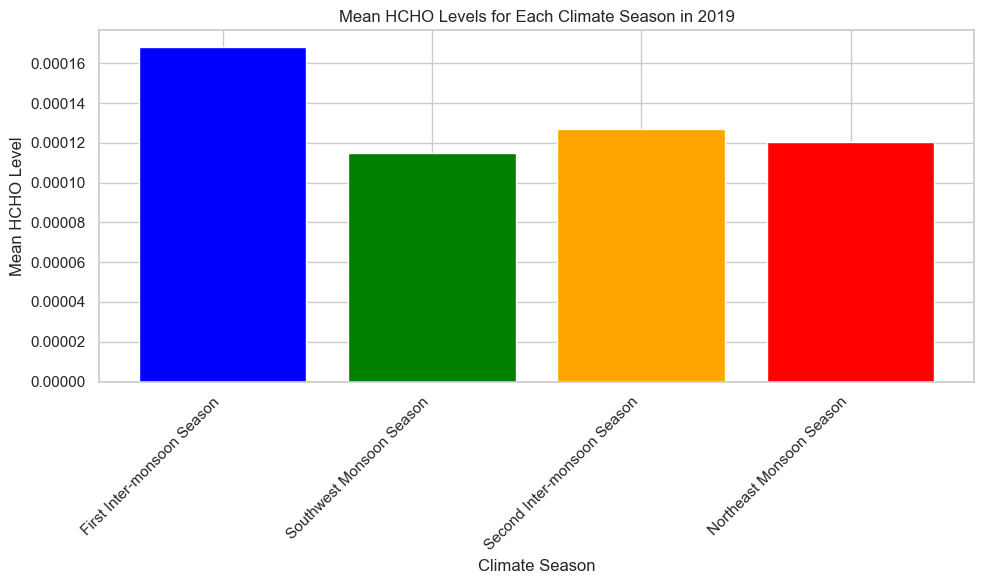

In [22]:
# Define the date ranges for each climate season using month numbers
seasons = {
    'First Inter-monsoon Season': (3, 4),  # March, April
    'Southwest Monsoon Season': (5, 6, 7, 8, 9),  # May to September
    'Second Inter-monsoon Season': (10, 11),  # October, November
    'Northeast Monsoon Season': (12, 1, 2)  # December to February
}

# Convert 'Current_Date' column to datetime format
hcho_data['Current_Date'] = pd.to_datetime(hcho_data['Current_Date'])

# Filter data for the year 2019
hcho_data_2019 = hcho_data[hcho_data['Current_Date'].dt.year == 2019]

# Calculate mean HCHO levels for each climate season
seasonly_mean_hcho = {}
for season, months in seasons.items():
    season_data = hcho_data_2019[hcho_data_2019['Current_Date'].dt.month.isin(months)]
    seasonly_mean_hcho[season] = season_data['HCHO_reading'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(seasonly_mean_hcho.keys(), seasonly_mean_hcho.values(), color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Climate Season')
plt.ylabel('Mean HCHO Level')
plt.title('Mean HCHO Levels for Each Climate Season in 2019')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From this analysis 